In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-sales-dataset/SuperStoreOrders.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data files

In [3]:
df = pd.read_csv('/kaggle/input/superstore-sales-dataset/SuperStoreOrders.csv')

# Exploratory data analysis 

In [4]:
df.shape

(51290, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

# Check duplication 

In [6]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool


In [7]:
df[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


In [8]:
df[df['order_id'].duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.10,37.7700,4.70,Medium,2011
5,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.10,15.3420,1.80,Medium,2011
11,IN-2011-65159,3/1/2011,7/1/2011,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Furniture,Tables,"Chromcraft Round Table, Adjustable Height",211,1,0.55,-70.3995,21.32,High,2011
14,ID-2011-80230,3/1/2011,9/1/2011,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Furniture,Chairs,"Hon Rocking Chair, Set of Two",159,2,0.40,-95.6760,10.07,Low,2011
17,ID-2011-80230,3/1/2011,9/1/2011,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Accessories,"Belkin Numeric Keypad, Bluetooth",69,2,0.40,3.4200,8.34,Low,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,MX-2014-141712,31-12-2014,31-12-2014,Same Day,Rick Bensley,Home Office,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Storage,"Smead Box, Industrial",15,2,0.00,1.2000,2.34,Critical,2014
51283,IN-2014-23754,31-12-2014,7/1/2015,Standard Class,Kalyca Meade,Corporate,Guangdong,China,APAC,North Asia,...,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79,3,0.00,25.3800,1.41,Medium,2014
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.20,4.5188,0.89,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.00,12.3600,0.35,Medium,2014


# Check Data type

In [9]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [10]:
df['order_date'] = df['order_date'].astype('datetime64[ns]') #convert object to date_time
df['ship_date'] = pd.to_datetime(df['ship_date'])  #convert object to date_time
df['sales'] = pd.to_numeric(df['sales'], errors='coerce') #convert object to float 


In [11]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

# Check null values 

In [12]:
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [13]:
df['sales'] = df['sales'].fillna(0)

In [14]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# Statistics 

In [15]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,152.761318,3.476545,0.142908,28.641740,26.375915,2012.777208
std,199.062579,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,24.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,68.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# Q1: Which segment is the best seller?

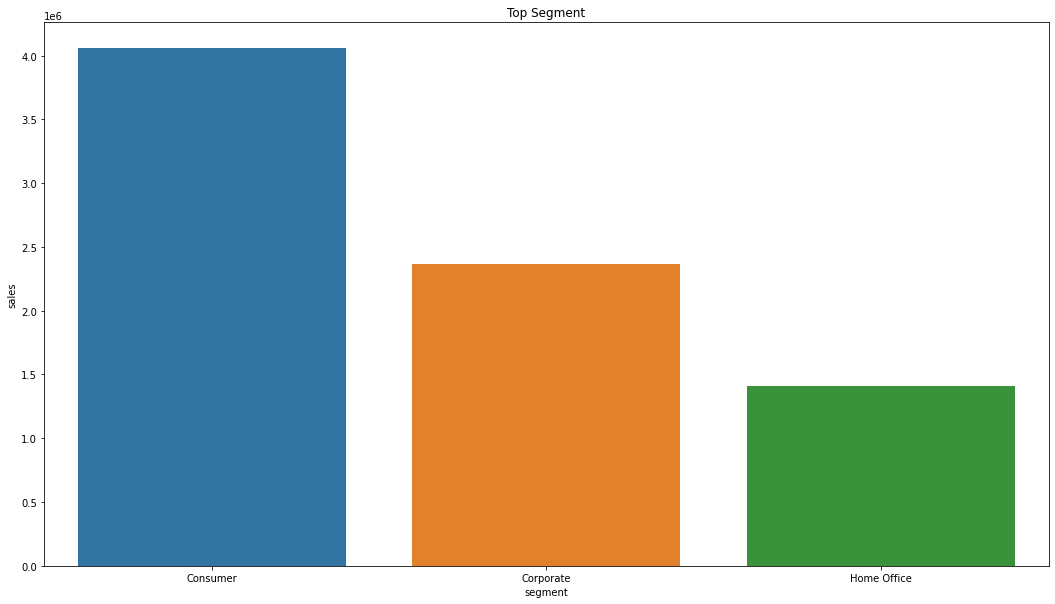

In [16]:
Top_Segment = df.groupby('segment')['sales'].sum()
fig,(ax1) = plt.subplots(1,1, figsize = (18,10))
ax1.set_title('Top Segment')
ax1.tick_params(labelrotation = 0)
#ax1.set_ylim(8,40)
sns.barplot(x =Top_Segment.index, y =Top_Segment, ax = ax1);

In [17]:
df["segment"].value_counts()


Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64

<AxesSubplot:xlabel='segment', ylabel='count'>

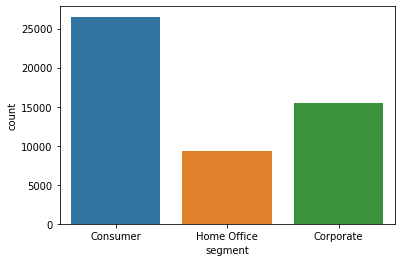

In [18]:
sns.countplot(x=df['segment'])

 # Q2: Which Region has the highest order count and In which Region do we need to grow our Business?

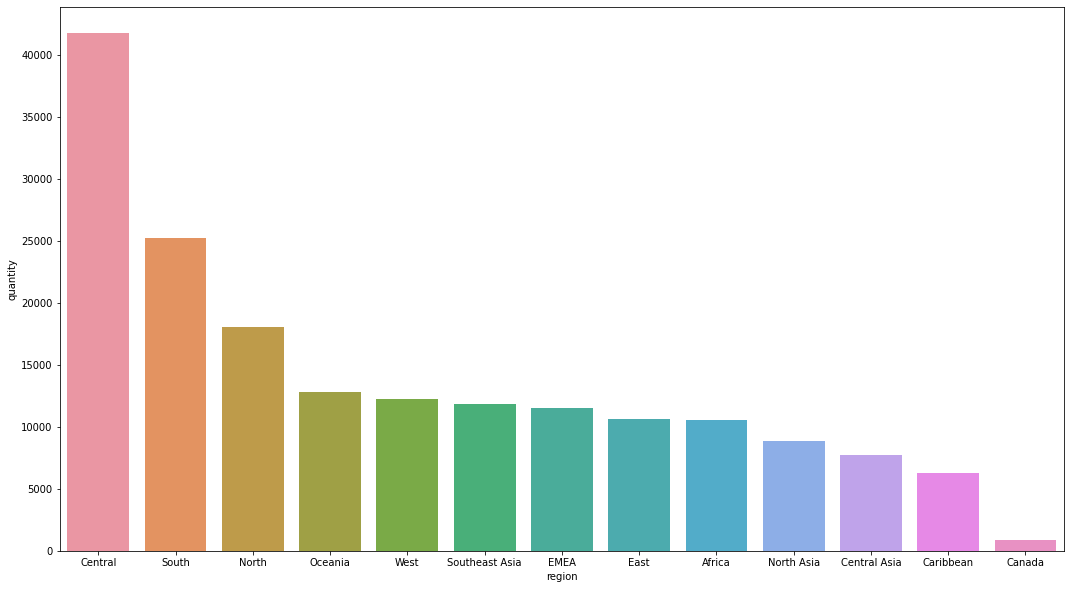

In [19]:
Region_order = df.groupby('region')['quantity'].sum().sort_values(ascending= False)
fig,(ax2) = plt.subplots(1,1, figsize = (18,10))
ax1.set_title('Top order')
ax1.tick_params(labelrotation = 0)
sns.barplot(x =Region_order.index, y =Region_order, ax = ax2);

In [20]:
df["region"].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

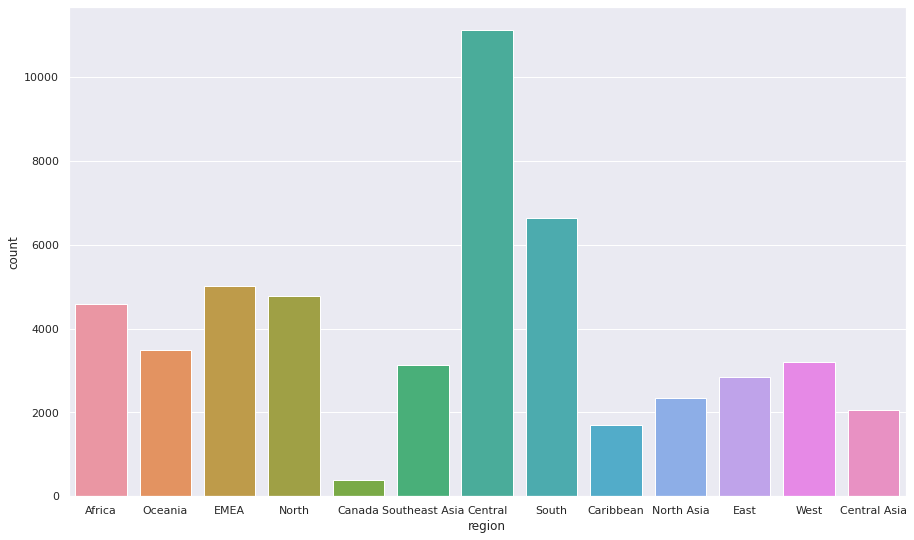

In [21]:
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x=df['region'])

# The Business is performing great in the Central Region with highest order count but it needs to Expand it's Business in Canadian Region.

# Q3: Who are the Top 10 Customers of the SuperStore and How much is their Repartition of the Profit?

<AxesSubplot:title={'center':'Customer Name & Product Ordered'}>

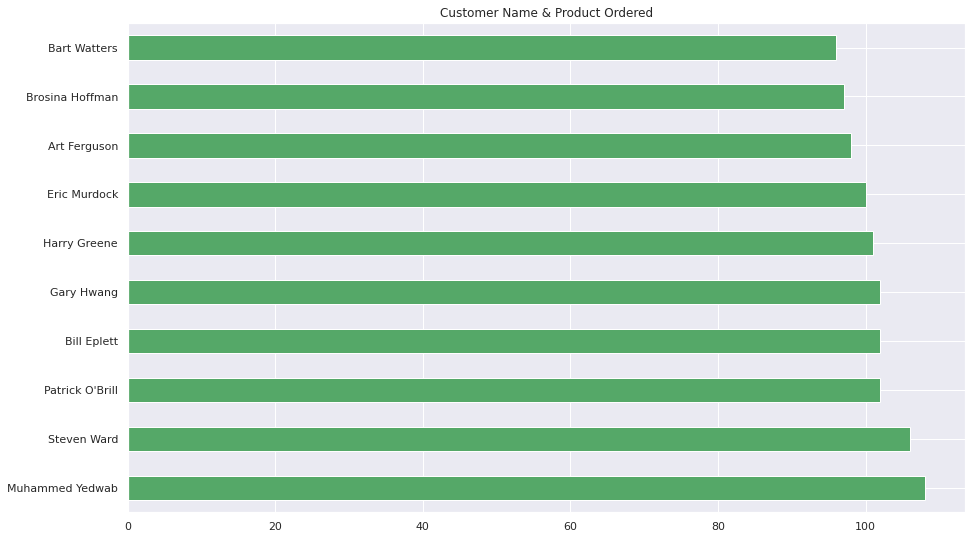

In [39]:
df['customer_name'].value_counts()[:10].plot(kind='barh',title='Customer Name & Product Ordered',color = 'g')

<AxesSubplot:title={'center':'Top 10 customers'}, ylabel='customer_name'>

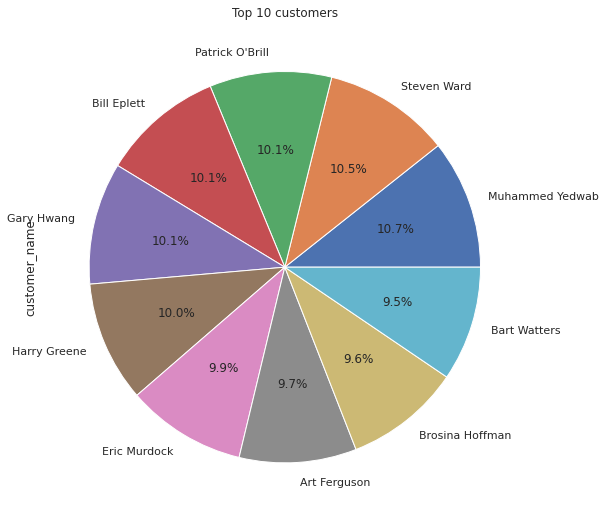

In [23]:
df['customer_name'].value_counts()[:10].plot(kind='pie',title='Top 10 customers',autopct='%0.1f%%')

In [24]:
customers = list(df['customer_name'].value_counts()[:10].index)
filters = df['customer_name'].isin(customers)
A = df[filters]

In [25]:
colors = sns.color_palette('pastel')[0:]


values = A.groupby('customer_name')['profit'].sum()
values

customer_name
Art Ferguson       2278.30370
Bart Watters       3595.88590
Bill Eplett        7410.00530
Brosina Hoffman    4876.93980
Eric Murdock       3306.01548
Gary Hwang         3908.11510
Harry Greene       -291.49228
Muhammed Yedwab    2642.65408
Patrick O'Brill    3778.36370
Steven Ward        2794.73160
Name: profit, dtype: float64

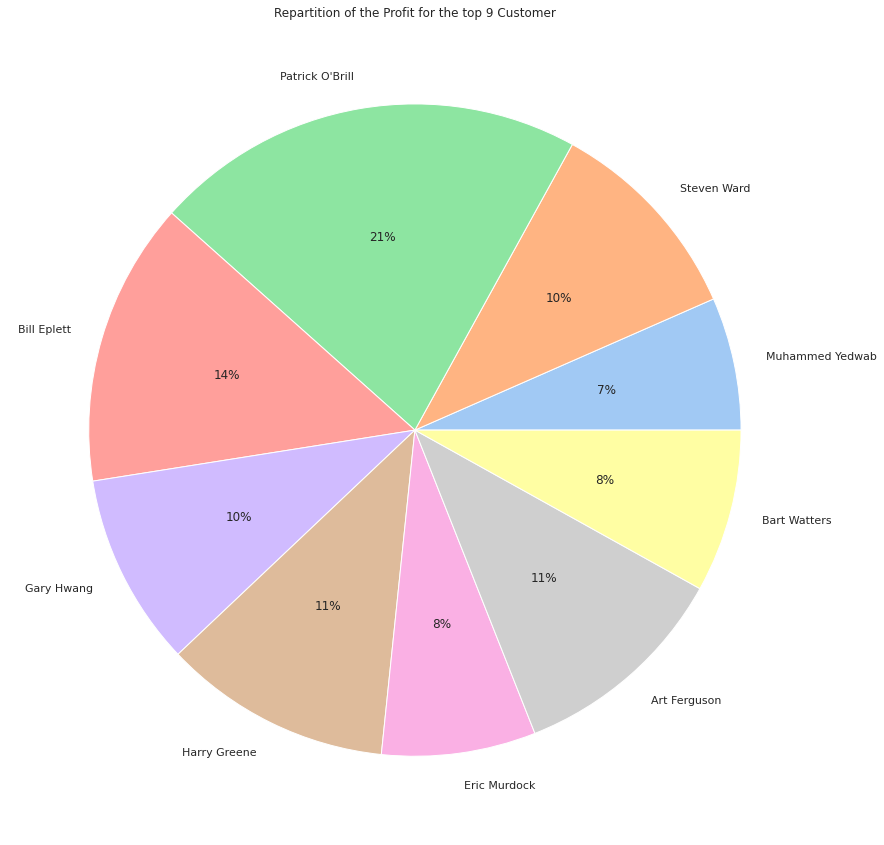

In [26]:
A = A[A['customer_name'] != 'Harry Greene']
del customers[-2]
plt.figure(figsize=(15,15))
values = A.groupby('customer_name')['profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the top 9 Customer")
plt.show()

# Q4: What are the Highest selling and Lowest Selling Sub-Category?

In [27]:
selling = df.groupby('sub_category')['sales'].sum().sort_values(ascending= False)

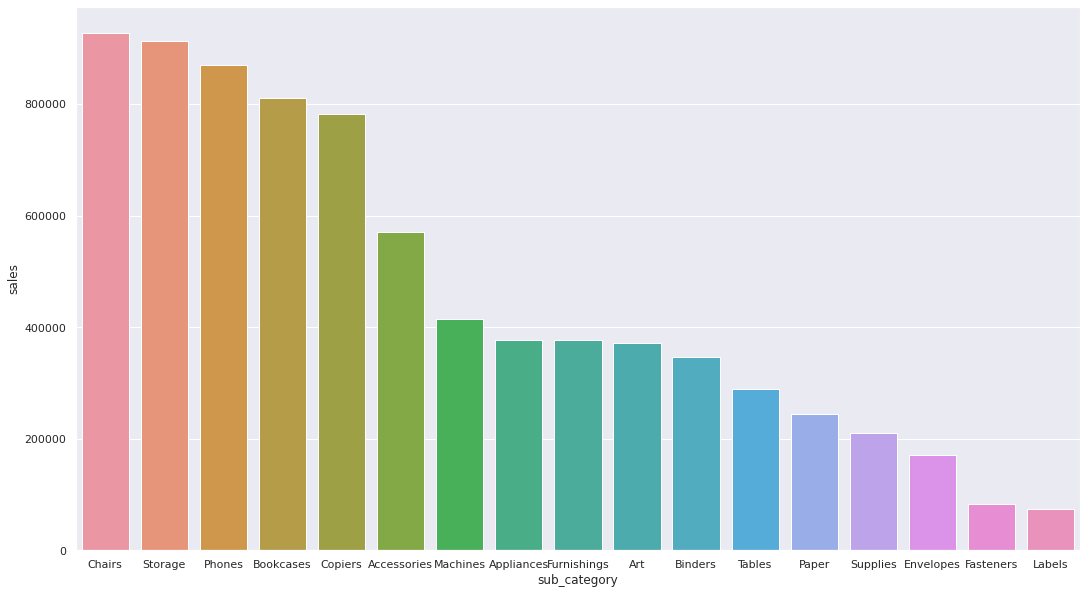

In [28]:
fig = plt.subplots(1,1, figsize = (18,10))
ax1.set_title('Sales')
sns.barplot(x = selling.index, y =selling);

In [29]:
df['sub_category'].value_counts().sort_values(ascending= False)

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: sub_category, dtype: int64

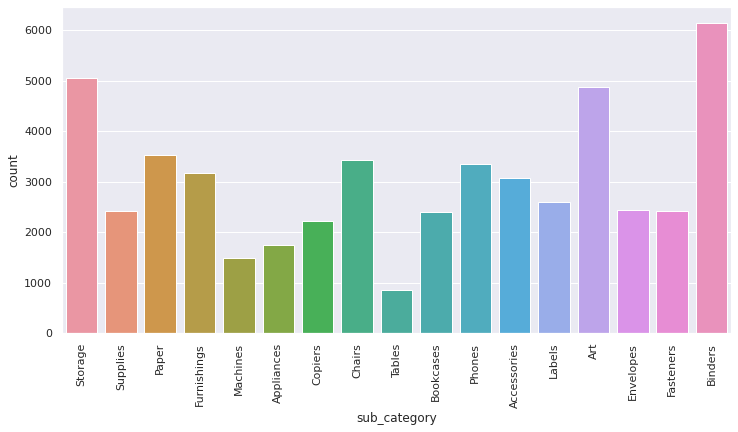

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['sub_category'])
plt.xticks(rotation=90)
plt.show()

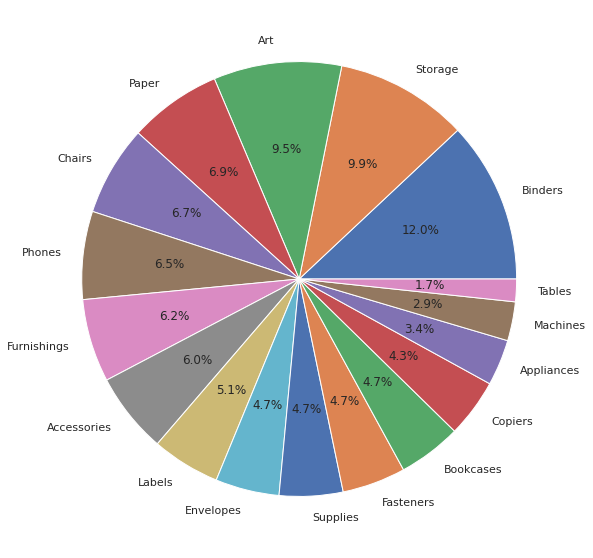

In [31]:
plt.figure(figsize=(15,10))
plt.pie(df['sub_category'].value_counts(),labels=df["sub_category"].value_counts().keys(),autopct="%0.1f%%")
plt.show()

# Q5: What are the Top 10 States with highest Order Count?

In [32]:
top_states =df['state'].value_counts().head(10).sort_values(ascending= False)

NameError: name 'top_state' is not defined

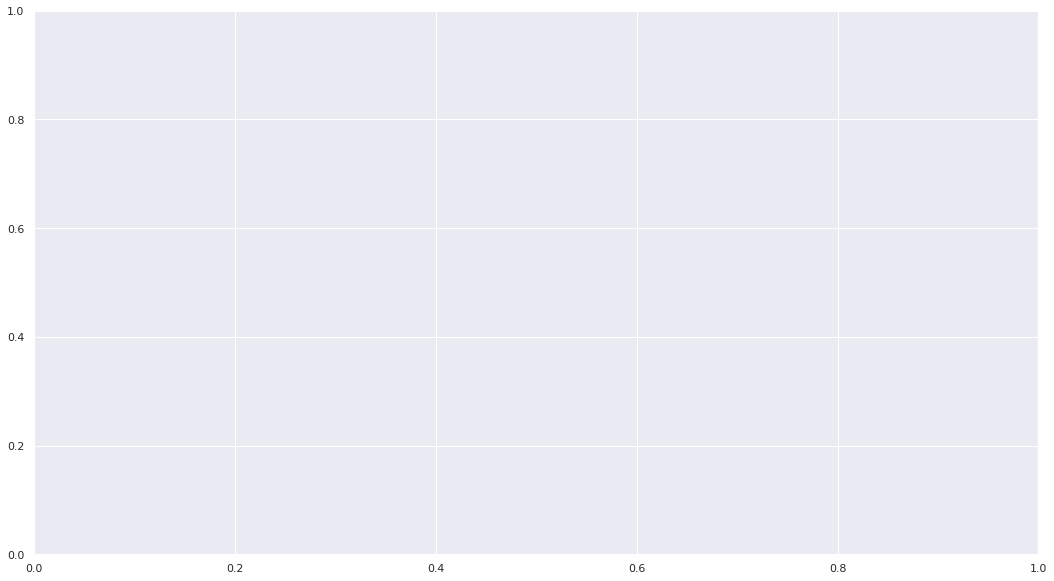

In [33]:
fig = plt.subplots(1,1, figsize = (18,10))
ax1.set_title('Sales')
sns.barplot(x = top_states.index, y = top_state);

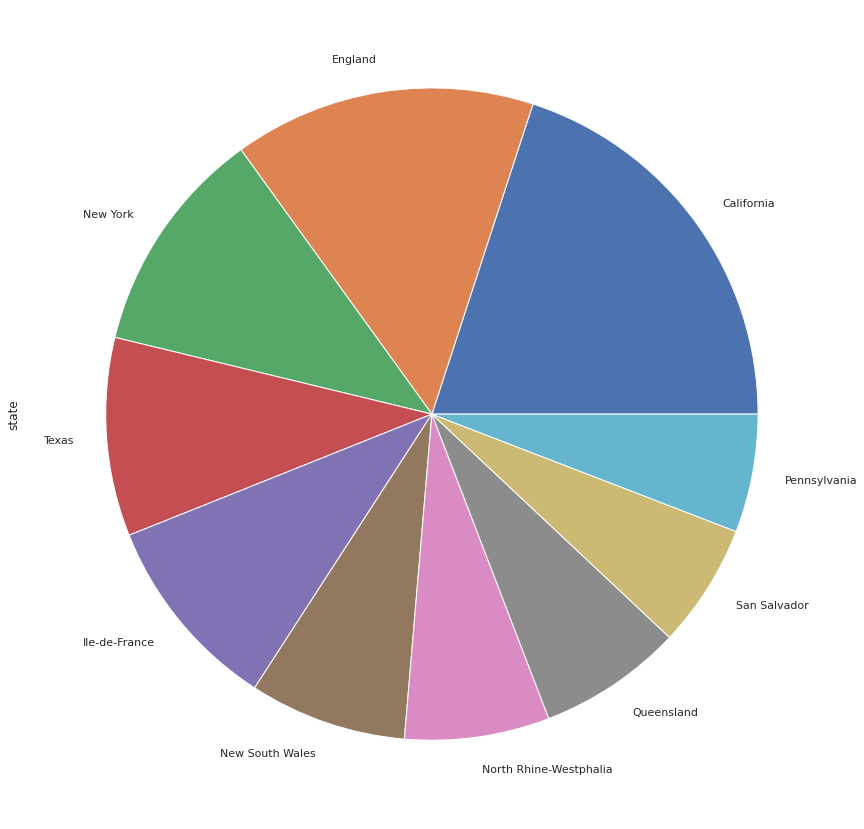

In [37]:
plt.figure(figsize=(20,15))
df['state'].value_counts().head(10).plot.pie()
plt.show()